# Tasks

# imports


In [1]:
# Machine Learning Library that contains example datasets.
import sklearn as skl
# I will import matplotlib so i can use this library for statisics, plotting etc
import matplotlib.pyplot as plt
# I will import numpy so i can perform various mathematical operations with my arrays 
import numpy as np
# I will import pandas because it is great for with dataframes
import pandas as pd
# sklearn is a popular machine learning library that provides tools for data preprocessing, model selection, and evaluation.
from scipy import stats
# Import seaborn
import seaborn as sns

## Task 1: Source the Data Set

We want to import the Iris data set from the sklearn.datasets module.
Then explain what the load_iris() function returns.

In [2]:
col_names= ("sepal_length",
    "sepal_width", 
    "petal_length", 
    "petal_width", 
    "class", 
)

#Load the iris dataset in as a dataframe. we can do this using the Pandas library which is used for data manipulation.
iris_df = pd.read_csv ("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv", sep=',', header=0, names=col_names)


The pd.read_csv () imports in as a dataframe the data from an external source (in this case a csv file in the hyperlink) .

## Task 2: Explore the Data Structure

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [3]:
#df.head() 
# let's eyeball the data so we can see it has imported okay
#'''
print(f"{iris_df}") 
#'''
# we can see the first four columns are numeric data comprising the sepal/petal length/width and then we have a column of alphabetical data in the iris class
# More importantly, we can see that everything has been sorted by the class column, so no need for us to sort again


     sepal_length  sepal_width  petal_length  petal_width      class
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [4]:
# Let's use drop na to get rid of the values in the series that have no value
    # this actually returns a numpy.ndarray
iris_df.dropna(inplace=True)
#let's show the data again to see if there was any change
#'''
#print(f"{iris_df}") 
#'''
# everything looks fine for us to work with the data now

 By calling the variable name that we assiged to the data we loaded,  it displays the data in a table. As someone has written in the names of the four different characteristics (sepal length, sepal width, petal length, and petal width) and the species which comprises three classes, Pandas has worked out these are the headers to the various variables oservations. Pandas tells us that yes there are 5 variables, and there are 150 observations, so we can say that the shape of the dataset is 150 x 5.
There are 50 observations for each of the three species, and we can see the sepal length, sepal width, petal length, and petal width for each of the 50 observations for each species.

In [5]:
iris_df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

Again, just confirming that there are 5 different variables.

In [6]:
# Again, showing there are 150 rows or observations.
iris_df["class"].shape

(150,)

In [7]:
#now to confirm the number of different classes of iris, we use the numpy unique function on the column titled "class"

print(f"{iris_df["class"].nunique()}")

# so there are 3 types, which matches with the attribute information in the data file 
# which says there are Iris Setosa, Iris Versicolour, and Iris Virginica
# we can be more confident that there were no typos in the class names

3


## Task 3: Summarize the Data

For each feature in the dataset, calculate and display:

    mean
    minimum
    maximum
    standard deviation
    median


In [8]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Let's confirm by using a quick while command (I could perhaps just create a function and call the function for each iris class )
count_setosa = 0
count_versicolor = 0
count_virginica = 0
max_rows=iris_df["class"].size

line_number = 0

while line_number < max_rows:
    if iris_df["class"][line_number] == "setosa":
        count_setosa = count_setosa + 1
        line_number = line_number + 1
    elif iris_df["class"][line_number] == "versicolor":
        count_versicolor = count_versicolor + 1 
        line_number = line_number + 1
    elif iris_df["class"][line_number] == "virginica":
        count_virginica = count_virginica + 1
        line_number = line_number + 1
    else :
        print(f"You have a typo in line {line_number}")
        line_number = line_number + 1
 
print (f"\nClass of Iris\tObervations \nSetosa:\t\t{count_setosa}\nVersicolor:\t{count_versicolor} \nVirginica:\t{count_virginica}\n")
#'''
# so now we know there are 150 observations, 5 columns of which 4 are numeric and one alphabetical, 
# 3 classes and definitely 50 instances of each class, which confirms the iris.names.data file



Class of Iris	Obervations 
Setosa:		50
Versicolor:	50 
Virginica:	50



In [10]:
#summary=df.describe()
#print(f"{summary}")

# A function for creating arrays for each class of iris
def creating_array(DataFrame,min,max):
    row_number = min # starting row of the dataframe for the relevant iris class
    output_array = [] # initilise the final array as being blank
    
    while row_number < max: # while the row number of the dataframe is less than the last row of data for that respective iris class (0-50,50-100,100-150)
         current_row_of_data = iris_df["sepal_length"][row_number],iris_df["sepal_width"][row_number],iris_df["petal_length"][row_number],iris_df["petal_width"][row_number]
         row_number = row_number + 1
         output_array = output_array + [current_row_of_data]
    #current_array = df["sepal_length"][row_number],df["sepal_width"][row_number],df["petal_length"][row_number],df["petal_width"][row_number]
    #output_array = output_array + [current_array] 
    return output_array

# so now I'm going to call the above function to create an array for each class, 
# This function creats_array to incrementally append each line of the spreadsheet to the existing array
# I'm going to do what i would do in Visual Basic and do it long hand because the append function won't work for me :-( 

#setosa = [] # create the blank setosa array
#versicolor = [] # create the blank versicolor array
#virginica =[] # create the blank virginica array
  
setosa = np.array(creating_array(iris_df, min=0,max=50)) # so to the function, we send the dataframe, the starting point and the last row for setosa which is 50
max = count_setosa + count_versicolor # so now we know versicolor starts after setosa, so the last row must be where count setosa + count versicolor combined, ie 100
versicolor = np.array(creating_array(iris_df, min=50,max = 100)) # so to the function, we send the dataframe, the starting point and the end point for versicolor
max = max + count_virginica # so now we know virginica starts after versicolor, so the last row must be the previous two combined + count versicolor combined, ie 150
virginica = np.array(creating_array(iris_df, min=100,max =150)) # so to the function, we send the dataframe, the starting point and the end point for virginica


# we can compare our each of our arrays against that of source spreadsheet
#print(f"The array for Setosa is:\n{setosa}\n\nThe array for Versicolor is:\n{versicolor}\n\nThe array for Virginica is:\n{virginica}")
# the rows all look good for each class

# Let's now create an array for iris, which in turn comprises the three arrays for setosa, versicolor and virginica
# iris = [setosa,versicolor,virginica]
# print(f"This is what an overall array comprising of 150 observations looks like: {iris}")
# okay, this matches the source data

# We want to output a summary of each variable 
# where I'm assuming each variable means feature "sepal_length", "sepal_width", "petal_length", and "petal_width"



### Descriptive Statistics for our Four Features are as follows:

Here we can see the number of iris, the mean or average of each of the four variables (sepal length, sepal width, petal length, and petal width), the standard deviation around the mean value, the minimum and maximum values, and finally the different quartiles, where the 50% quartile is our median value.

In [11]:
#*************************************************************************************************************************************
# Sepal Lengths
#*************************************************************************************************************************************
setosa_sepal_length=np.array([setosa[0][0],setosa[1][0],setosa[2][0],setosa[3][0],setosa[4][0],setosa[5][0],setosa[6][0],setosa[7][0],setosa[8][0],setosa[9][0],setosa[10][0],setosa[11][0],setosa[12][0],setosa[13][0],setosa[14][0],setosa[15][0],setosa[16][0],setosa[17][0],setosa[18][0],setosa[19][0],setosa[20][0],setosa[21][0],setosa[22][0],setosa[23][0],setosa[24][0],setosa[25][0],setosa[26][0],setosa[27][0],setosa[28][0],setosa[29][0],setosa[30][0],setosa[31][0],setosa[32][0],setosa[33][0],setosa[34][0],setosa[35][0],setosa[36][0],setosa[37][0],setosa[38][0],setosa[39][0],setosa[40][0],setosa[41][0],setosa[42][0],setosa[43][0],setosa[44][0],setosa[45][0],setosa[46][0],setosa[47][0],setosa[48][0],setosa[49][0]])
#print(f"Setosa Sepal Lengths are:\n {setosa_sepal_length}\n")
versicolor_sepal_length=np.array([versicolor[0][0],versicolor[1][0],versicolor[2][0],versicolor[3][0],versicolor[4][0],versicolor[5][0],versicolor[6][0],versicolor[7][0],versicolor[8][0],versicolor[9][0],versicolor[10][0],versicolor[11][0],versicolor[12][0],versicolor[13][0],versicolor[14][0],versicolor[15][0],versicolor[16][0],versicolor[17][0],versicolor[18][0],versicolor[19][0],versicolor[20][0],versicolor[21][0],versicolor[22][0],versicolor[23][0],versicolor[24][0],versicolor[25][0],versicolor[26][0],versicolor[27][0],versicolor[28][0],versicolor[29][0],versicolor[30][0],versicolor[31][0],versicolor[32][0],versicolor[33][0],versicolor[34][0],versicolor[35][0],versicolor[36][0],versicolor[37][0],versicolor[38][0],versicolor[39][0],versicolor[40][0],versicolor[41][0],versicolor[42][0],versicolor[43][0],versicolor[44][0],versicolor[45][0],versicolor[46][0],versicolor[47][0],versicolor[48][0],versicolor[49][0]])
#print(f"Versicolor Sepal Lengths are:\n {versicolor_sepal_length}\n")
virginica_sepal_length=np.array([virginica[0][0],virginica[1][0],virginica[2][0],virginica[3][0],virginica[4][0],virginica[5][0],virginica[6][0],virginica[7][0],virginica[8][0],virginica[9][0],virginica[10][0],virginica[11][0],virginica[12][0],virginica[13][0],virginica[14][0],virginica[15][0],virginica[16][0],virginica[17][0],virginica[18][0],virginica[19][0],virginica[20][0],virginica[21][0],virginica[22][0],virginica[23][0],virginica[24][0],virginica[25][0],virginica[26][0],virginica[27][0],virginica[28][0],virginica[29][0],virginica[30][0],virginica[31][0],virginica[32][0],virginica[33][0],virginica[34][0],virginica[35][0],virginica[36][0],virginica[37][0],virginica[38][0],virginica[39][0],virginica[40][0],virginica[41][0],virginica[42][0],virginica[43][0],virginica[44][0],virginica[45][0],virginica[46][0],virginica[47][0],virginica[48][0],virginica[49][0]])
#print(f"Virginica Sepal Lengths are:\n {virginica_sepal_length}")
overall_sepal_length= iris_df["sepal_length"]

# Descriptive Statistics
print(f"\nSepal Lengths")
print(f"\t\tSetosa\t\tVersicolor\tVirginica\tOverall")
print(f"Count:\t\t{count_setosa}\t\t{count_versicolor}\t\t{count_virginica}\t\t{max_rows}")
print(f"Mean:\t\t{round(np.mean(setosa_sepal_length),2)}\t\t{round(np.mean(versicolor_sepal_length),2)}\t\t{round(np.mean(virginica_sepal_length),2)}\t\t{round(np.mean(overall_sepal_length),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_sepal_length),2)}\t\t{round(np.std(versicolor_sepal_length),2)}\t\t{round(np.std(virginica_sepal_length),2)}\t\t{round(np.std(overall_sepal_length),2)}")
print(f"Median:\t\t{round(np.median(setosa_sepal_length),2)}\t\t{round(np.median(versicolor_sepal_length),2)}\t\t{round(np.median(virginica_sepal_length),2)}\t\t{round(np.median(overall_sepal_length),2)}")

print(f"Minimum:\t{round(np.min(setosa_sepal_length),2)}\t\t{round(np.min(versicolor_sepal_length),2)}\t\t{round(np.min(virginica_sepal_length),2)}\t\t{round(np.min(overall_sepal_length),2)}")
print(f"25%:\t\t{round(np.percentile(setosa_sepal_length,25),2)}\t\t{round(np.percentile(versicolor_sepal_length,25),2)}\t\t{round(np.percentile(virginica_sepal_length,25),2)}\t\t{round(np.percentile(overall_sepal_length,25),2)}")
print(f"50%:\t\t{round(np.percentile(setosa_sepal_length,50),2)}\t\t{round(np.percentile(versicolor_sepal_length,50),2)}\t\t{round(np.percentile(virginica_sepal_length,50),2)}\t\t{round(np.percentile(overall_sepal_length,50),2)}")
print(f"75%:\t\t{round(np.percentile(setosa_sepal_length,75),2)}\t\t{round(np.percentile(versicolor_sepal_length,75),2)}\t\t{round(np.percentile(virginica_sepal_length,75),2)}\t\t{round(np.percentile(overall_sepal_length,75),2)}")
print(f"Maximum:\t{round(np.max(setosa_sepal_length),2)}\t\t{round(np.max(versicolor_sepal_length),2)}\t\t{round(np.max(virginica_sepal_length),2)}\t\t{round(np.max(overall_sepal_length),2)}")


Sepal Lengths
		Setosa		Versicolor	Virginica	Overall
Count:		50		50		50		150
Mean:		5.01		5.94		6.59		5.84
St.Dev:		0.35		0.51		0.63		0.83
Median:		5.0		5.9		6.5		5.8
Minimum:	4.3		4.9		4.9		4.3
25%:		4.8		5.6		6.22		5.1
50%:		5.0		5.9		6.5		5.8
75%:		5.2		6.3		6.9		6.4
Maximum:	5.8		7.0		7.9		7.9


In [12]:
#*************************************************************************************************************************************
# Sepal Widths
#*************************************************************************************************************************************
setosa_sepal_width=np.array([setosa[0][1],setosa[1][1],setosa[2][1],setosa[3][1],setosa[4][1],setosa[5][1],setosa[6][1],setosa[7][1],setosa[8][1],setosa[9][1],setosa[10][1],setosa[11][1],setosa[12][1],setosa[13][1],setosa[14][1],setosa[15][1],setosa[16][1],setosa[17][1],setosa[18][1],setosa[19][1],setosa[20][1],setosa[21][1],setosa[22][1],setosa[23][1],setosa[24][1],setosa[25][1],setosa[26][1],setosa[27][1],setosa[28][1],setosa[29][1],setosa[30][1],setosa[31][1],setosa[32][1],setosa[33][1],setosa[34][1],setosa[35][1],setosa[36][1],setosa[37][1],setosa[38][1],setosa[39][1],setosa[40][1],setosa[41][1],setosa[42][1],setosa[43][1],setosa[44][1],setosa[45][1],setosa[46][1],setosa[47][1],setosa[48][1],setosa[49][1]])
#print(f"\nSetosa Sepal widths are:\n {setosa_sepal_width}\n")
versicolor_sepal_width=np.array([versicolor[0][1],versicolor[1][1],versicolor[2][1],versicolor[3][1],versicolor[4][1],versicolor[5][1],versicolor[6][1],versicolor[7][1],versicolor[8][1],versicolor[9][1],versicolor[10][1],versicolor[11][1],versicolor[12][1],versicolor[13][1],versicolor[14][1],versicolor[15][1],versicolor[16][1],versicolor[17][1],versicolor[18][1],versicolor[19][1],versicolor[20][1],versicolor[21][1],versicolor[22][1],versicolor[23][1],versicolor[24][1],versicolor[25][1],versicolor[26][1],versicolor[27][1],versicolor[28][1],versicolor[29][1],versicolor[30][1],versicolor[31][1],versicolor[32][1],versicolor[33][1],versicolor[34][1],versicolor[35][1],versicolor[36][1],versicolor[37][1],versicolor[38][1],versicolor[39][1],versicolor[40][1],versicolor[41][1],versicolor[42][1],versicolor[43][1],versicolor[44][1],versicolor[45][1],versicolor[46][1],versicolor[47][1],versicolor[48][1],versicolor[49][1]])
#print(f"Versicolor Sepal widths are:\n {versicolor_sepal_width}\n")
virginica_sepal_width=np.array([virginica[0][1],virginica[1][1],virginica[2][1],virginica[3][1],virginica[4][1],virginica[5][1],virginica[6][1],virginica[7][1],virginica[8][1],virginica[9][1],virginica[10][1],virginica[11][1],virginica[12][1],virginica[13][1],virginica[14][1],virginica[15][1],virginica[16][1],virginica[17][1],virginica[18][1],virginica[19][1],virginica[20][1],virginica[21][1],virginica[22][1],virginica[23][1],virginica[24][1],virginica[25][1],virginica[26][1],virginica[27][1],virginica[28][1],virginica[29][1],virginica[30][1],virginica[31][1],virginica[32][1],virginica[33][1],virginica[34][1],virginica[35][1],virginica[36][1],virginica[37][1],virginica[38][1],virginica[39][1],virginica[40][1],virginica[41][1],virginica[42][1],virginica[43][1],virginica[44][1],virginica[45][1],virginica[46][1],virginica[47][1],virginica[48][1],virginica[49][1]])
#print(f"Virginica Sepal widths are:\n {virginica_sepal_width}")
overall_sepal_width= iris_df["sepal_width"]

# Descriptive Statistics
print(f"\nSepal Widths")
print(f"\t\tSetosa\t\tVersicolor\tVirginica\tOverall")
print(f"Count:\t\t{count_setosa}\t\t{count_versicolor}\t\t{count_virginica}\t\t{max_rows}")
print(f"Mean:\t\t{round(np.mean(setosa_sepal_width),2)}\t\t{round(np.mean(versicolor_sepal_width),2)}\t\t{round(np.mean(virginica_sepal_width),2)}\t\t{round(np.mean(overall_sepal_width),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_sepal_width),2)}\t\t{round(np.std(versicolor_sepal_width),2)}\t\t{round(np.std(virginica_sepal_width),2)}\t\t{round(np.std(overall_sepal_width),2)}")
print(f"Median:\t\t{round(np.median(setosa_sepal_width),2)}\t\t{round(np.median(versicolor_sepal_width),2)}\t\t{round(np.median(virginica_sepal_width),2)}\t\t{round(np.median(overall_sepal_width),2)}")

print(f"Minimum:\t{round(np.min(setosa_sepal_width),2)}\t\t{round(np.min(versicolor_sepal_width),2)}\t\t{round(np.min(virginica_sepal_width),2)}\t\t{round(np.min(overall_sepal_width),2)}")
print(f"25%:\t\t{round(np.percentile(setosa_sepal_width,25),2)}\t\t{round(np.percentile(versicolor_sepal_width,25),2)}\t\t{round(np.percentile(virginica_sepal_width,25),2)}\t\t{round(np.percentile(overall_sepal_width,25),2)}")
print(f"50%:\t\t{round(np.percentile(setosa_sepal_width,50),2)}\t\t{round(np.percentile(versicolor_sepal_width,50),2)}\t\t{round(np.percentile(virginica_sepal_width,50),2)}\t\t{round(np.percentile(overall_sepal_width,50),2)}")
print(f"75%:\t\t{round(np.percentile(setosa_sepal_width,75),2)}\t\t{round(np.percentile(versicolor_sepal_width,75),2)}\t\t{round(np.percentile(virginica_sepal_width,75),2)}\t\t{round(np.percentile(overall_sepal_width,75),2)}")
print(f"Maximum:\t{round(np.max(setosa_sepal_width),2)}\t\t{round(np.max(versicolor_sepal_width),2)}\t\t{round(np.max(virginica_sepal_width),2)}\t\t{round(np.max(overall_sepal_width),2)}")


Sepal Widths
		Setosa		Versicolor	Virginica	Overall
Count:		50		50		50		150
Mean:		3.42		2.77		2.97		3.05
St.Dev:		0.38		0.31		0.32		0.43
Median:		3.4		2.8		3.0		3.0
Minimum:	2.3		2.0		2.2		2.0
25%:		3.12		2.52		2.8		2.8
50%:		3.4		2.8		3.0		3.0
75%:		3.68		3.0		3.18		3.3
Maximum:	4.4		3.4		3.8		4.4


In [13]:
#*************************************************************************************************************************************
# Petal Lengths
#*************************************************************************************************************************************
setosa_petal_length=np.array([setosa[0][2],setosa[1][2],setosa[2][2],setosa[3][2],setosa[4][2],setosa[5][2],setosa[6][2],setosa[7][2],setosa[8][2],setosa[9][2],setosa[10][2],setosa[11][2],setosa[12][2],setosa[13][2],setosa[14][2],setosa[15][2],setosa[16][2],setosa[17][2],setosa[18][2],setosa[19][2],setosa[20][2],setosa[21][2],setosa[22][2],setosa[23][2],setosa[24][2],setosa[25][2],setosa[26][2],setosa[27][2],setosa[28][2],setosa[29][2],setosa[30][2],setosa[31][2],setosa[32][2],setosa[33][2],setosa[34][2],setosa[35][2],setosa[36][2],setosa[37][2],setosa[38][2],setosa[39][2],setosa[40][2],setosa[41][2],setosa[42][2],setosa[43][2],setosa[44][2],setosa[45][2],setosa[46][2],setosa[47][2],setosa[48][2],setosa[49][2]])
#print(f"\nSetosa Petal Lengths are:\n {setosa_petal_length}")
versicolor_petal_length=np.array([versicolor[0][2],versicolor[1][2],versicolor[2][2],versicolor[3][2],versicolor[4][2],versicolor[5][2],versicolor[6][2],versicolor[7][2],versicolor[8][2],versicolor[9][2],versicolor[10][2],versicolor[11][2],versicolor[12][2],versicolor[13][2],versicolor[14][2],versicolor[15][2],versicolor[16][2],versicolor[17][2],versicolor[18][2],versicolor[19][2],versicolor[20][2],versicolor[21][2],versicolor[22][2],versicolor[23][2],versicolor[24][2],versicolor[25][2],versicolor[26][2],versicolor[27][2],versicolor[28][2],versicolor[29][2],versicolor[30][2],versicolor[31][2],versicolor[32][2],versicolor[33][2],versicolor[34][2],versicolor[35][2],versicolor[36][2],versicolor[37][2],versicolor[38][2],versicolor[39][2],versicolor[40][2],versicolor[41][2],versicolor[42][2],versicolor[43][2],versicolor[44][2],versicolor[45][2],versicolor[46][2],versicolor[47][2],versicolor[48][2],versicolor[49][2]])
#print(f"Versicolor Petal Lengths are:\n {versicolor_petal_length}\n")
virginica_petal_length=np.array([virginica[0][2],virginica[1][2],virginica[2][2],virginica[3][2],virginica[4][2],virginica[5][2],virginica[6][2],virginica[7][2],virginica[8][2],virginica[9][2],virginica[10][2],virginica[11][2],virginica[12][2],virginica[13][2],virginica[14][2],virginica[15][2],virginica[16][2],virginica[17][2],virginica[18][2],virginica[19][2],virginica[20][2],virginica[21][2],virginica[22][2],virginica[23][2],virginica[24][2],virginica[25][2],virginica[26][2],virginica[27][2],virginica[28][2],virginica[29][2],virginica[30][2],virginica[31][2],virginica[32][2],virginica[33][2],virginica[34][2],virginica[35][2],virginica[36][2],virginica[37][2],virginica[38][2],virginica[39][2],virginica[40][2],virginica[41][2],virginica[42][2],virginica[43][2],virginica[44][2],virginica[45][2],virginica[46][2],virginica[47][2],virginica[48][2],virginica[49][2]])
#print(f"Virginica Petal Lengths are:\n {virginica_petal_length}")
overall_petal_length=iris_df["petal_length"]

# Descriptive Statistics
print(f"\nPetal Length")
print(f"\t\tSetosa\t\tVersicolor\tVirginica\tOverall")
print(f"Count:\t\t{count_setosa}\t\t{count_versicolor}\t\t{count_virginica}\t\t{max_rows}")
print(f"Mean:\t\t{round(np.mean(setosa_petal_length),2)}\t\t{round(np.mean(versicolor_petal_length),2)}\t\t{round(np.mean(virginica_petal_length),2)}\t\t{round(np.mean(overall_petal_length),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_petal_length),2)}\t\t{round(np.std(versicolor_petal_length),2)}\t\t{round(np.std(virginica_petal_length),2)}\t\t{round(np.std(overall_petal_length),2)}")
print(f"Median:\t\t{round(np.median(setosa_petal_length),2)}\t\t{round(np.median(versicolor_petal_length),2)}\t\t{round(np.median(virginica_petal_length),2)}\t\t{round(np.median(overall_petal_length),2)}")

print(f"Minimum:\t{round(np.min(setosa_petal_length),2)}\t\t{round(np.min(versicolor_petal_length),2)}\t\t{round(np.min(virginica_petal_length),2)}\t\t{round(np.min(overall_petal_length),2)}")
print(f"25%:\t\t{round(np.percentile(setosa_petal_length,25),2)}\t\t{round(np.percentile(versicolor_petal_length,25),2)}\t\t{round(np.percentile(virginica_petal_length,25),2)}\t\t{round(np.percentile(overall_petal_length,25),2)}")
print(f"50%:\t\t{round(np.percentile(setosa_petal_length,50),2)}\t\t{round(np.percentile(versicolor_petal_length,50),2)}\t\t{round(np.percentile(virginica_petal_length,50),2)}\t\t{round(np.percentile(overall_petal_length,50),2)}")
print(f"75%:\t\t{round(np.percentile(setosa_petal_length,75),2)}\t\t{round(np.percentile(versicolor_petal_length,75),2)}\t\t{round(np.percentile(virginica_petal_length,75),2)}\t\t{round(np.percentile(overall_petal_length,75),2)}")
print(f"Maximum:\t{round(np.max(setosa_petal_length),2)}\t\t{round(np.max(versicolor_petal_length),2)}\t\t{round(np.max(virginica_petal_length),2)}\t\t{round(np.max(overall_petal_length),2)}")


Petal Length
		Setosa		Versicolor	Virginica	Overall
Count:		50		50		50		150
Mean:		1.46		4.26		5.55		3.76
St.Dev:		0.17		0.47		0.55		1.76
Median:		1.5		4.35		5.55		4.35
Minimum:	1.0		3.0		4.5		1.0
25%:		1.4		4.0		5.1		1.6
50%:		1.5		4.35		5.55		4.35
75%:		1.58		4.6		5.88		5.1
Maximum:	1.9		5.1		6.9		6.9


In [14]:
#*************************************************************************************************************************************
# Petal Widths
#*************************************************************************************************************************************
setosa_petal_width=np.array([setosa[0][3],setosa[1][3],setosa[2][3],setosa[3][3],setosa[4][3],setosa[5][3],setosa[6][3],setosa[7][3],setosa[8][3],setosa[9][3],setosa[10][3],setosa[11][3],setosa[12][3],setosa[13][3],setosa[14][3],setosa[15][3],setosa[16][3],setosa[17][3],setosa[18][3],setosa[19][3],setosa[20][3],setosa[21][3],setosa[22][3],setosa[23][3],setosa[24][3],setosa[25][3],setosa[26][3],setosa[27][3],setosa[28][3],setosa[29][3],setosa[30][3],setosa[31][3],setosa[32][3],setosa[33][3],setosa[34][3],setosa[35][3],setosa[36][3],setosa[37][3],setosa[38][3],setosa[39][3],setosa[40][3],setosa[41][3],setosa[42][3],setosa[43][3],setosa[44][3],setosa[45][3],setosa[46][3],setosa[47][3],setosa[48][3],setosa[49][3]])
#print(f"\nSetosa Petal Widths are:\n {setosa_petal_width}\n")
versicolor_petal_width=np.array([versicolor[0][3],versicolor[1][3],versicolor[2][3],versicolor[3][3],versicolor[4][3],versicolor[5][3],versicolor[6][3],versicolor[7][3],versicolor[8][3],versicolor[9][3],versicolor[10][3],versicolor[11][3],versicolor[12][3],versicolor[13][3],versicolor[14][3],versicolor[15][3],versicolor[16][3],versicolor[17][3],versicolor[18][3],versicolor[19][3],versicolor[20][3],versicolor[21][3],versicolor[22][3],versicolor[23][3],versicolor[24][3],versicolor[25][3],versicolor[26][3],versicolor[27][3],versicolor[28][3],versicolor[29][3],versicolor[30][3],versicolor[31][3],versicolor[32][3],versicolor[33][3],versicolor[34][3],versicolor[35][3],versicolor[36][3],versicolor[37][3],versicolor[38][3],versicolor[39][3],versicolor[40][3],versicolor[41][3],versicolor[42][3],versicolor[43][3],versicolor[44][3],versicolor[45][3],versicolor[46][3],versicolor[47][3],versicolor[48][3],versicolor[49][3]])
#print(f"Versicolor Petal Widths are:\n {versicolor_petal_width}\n")
virginica_petal_width=np.array([virginica[0][3],virginica[1][3],virginica[2][3],virginica[3][3],virginica[4][3],virginica[5][3],virginica[6][3],virginica[7][3],virginica[8][3],virginica[9][3],virginica[10][3],virginica[11][3],virginica[12][3],virginica[13][3],virginica[14][3],virginica[15][3],virginica[16][3],virginica[17][3],virginica[18][3],virginica[19][3],virginica[20][3],virginica[21][3],virginica[22][3],virginica[23][3],virginica[24][3],virginica[25][3],virginica[26][3],virginica[27][3],virginica[28][3],virginica[29][3],virginica[30][3],virginica[31][3],virginica[32][3],virginica[33][3],virginica[34][3],virginica[35][3],virginica[36][3],virginica[37][3],virginica[38][3],virginica[39][3],virginica[40][3],virginica[41][3],virginica[42][3],virginica[43][3],virginica[44][3],virginica[45][3],virginica[46][3],virginica[47][3],virginica[48][3],virginica[49][3]])
#print(f"Virginica Petal Widths are:\n {virginica_petal_width}")
overall_petal_width=iris_df["petal_width"]

# Descriptive Statistics
print(f"\nPetal Widths")
print(f"\t\tSetosa\t\tVersicolor\tVirginica\tOverall")
print(f"Count:\t\t{count_setosa}\t\t{count_versicolor}\t\t{count_virginica}\t\t{max_rows}")
print(f"Mean:\t\t{round(np.mean(setosa_petal_width),2)}\t\t{round(np.mean(versicolor_petal_width),2)}\t\t{round(np.mean(virginica_petal_width),2)}\t\t{round(np.mean(overall_petal_width),2)}")
print(f"St.Dev:\t\t{round(np.std(setosa_petal_width),2)}\t\t{round(np.std(versicolor_petal_width),2)}\t\t{round(np.std(virginica_petal_width),2)}\t\t{round(np.std(overall_petal_width),2)}")
print(f"Median:\t\t{round(np.median(setosa_petal_width),2)}\t\t{round(np.median(versicolor_petal_width),2)}\t\t{round(np.median(virginica_petal_width),2)}\t\t{round(np.median(overall_petal_width),2)}")

print(f"Minimum:\t{round(np.min(setosa_petal_width),2)}\t\t{round(np.min(versicolor_petal_width),2)}\t\t{round(np.min(virginica_petal_width),2)}\t\t{round(np.min(overall_petal_width),2)}")
print(f"25%:\t\t{round(np.percentile(setosa_petal_width,25),2)}\t\t{round(np.percentile(versicolor_petal_width,25),2)}\t\t{round(np.percentile(virginica_petal_width,25),2)}\t\t{round(np.percentile(overall_petal_width,25),2)}")
print(f"50%:\t\t{round(np.percentile(setosa_petal_width,50),2)}\t\t{round(np.percentile(versicolor_petal_width,50),2)}\t\t{round(np.percentile(virginica_petal_width,50),2)}\t\t{round(np.percentile(overall_petal_width,50),2)}")
print(f"75%:\t\t{round(np.percentile(setosa_petal_width,75),2)}\t\t{round(np.percentile(versicolor_petal_width,75),2)}\t\t{round(np.percentile(virginica_petal_width,75),2)}\t\t{round(np.percentile(overall_petal_width,75),2)}")
print(f"Maximum:\t{round(np.max(setosa_petal_width),2)}\t\t{round(np.max(versicolor_petal_width),2)}\t\t{round(np.max(virginica_petal_width),2)}\t\t{round(np.max(overall_petal_width),2)}")


Petal Widths
		Setosa		Versicolor	Virginica	Overall
Count:		50		50		50		150
Mean:		0.24		1.33		2.03		1.2
St.Dev:		0.11		0.2		0.27		0.76
Median:		0.2		1.3		2.0		1.3
Minimum:	0.1		1.0		1.4		0.1
25%:		0.2		1.2		1.8		0.3
50%:		0.2		1.3		2.0		1.3
75%:		0.3		1.5		2.3		1.8
Maximum:	0.6		1.8		2.5		2.5


## Task 4: Visualize Features

Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.


Our histograms showing how the sepal lengths of each of the three unique types of iris compare:

Text(0.5, 1.0, 'Sepal Lengths')

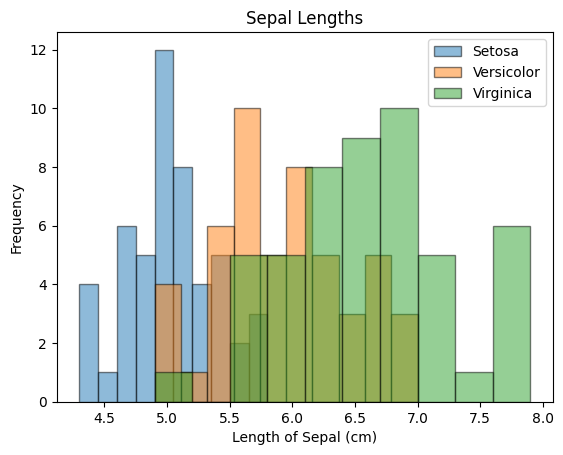

In [15]:
#*************************************************************************************************************************************
# Sepal Lengths
#*************************************************************************************************************************************
fig, ax = plt.subplots()
# I'm going to separate each class of iris on the historgram because it can help determine how they differ
ax.hist(setosa_sepal_length, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_sepal_length, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_sepal_length, bins=10, edgecolor="black", label="Virginica", alpha=0.5)
ax.legend()
ax.set_xlabel("Length of Sepal (cm)")
ax.set_ylabel("Frequency")
plt.title("Sepal Lengths")
#plt.show()
#plt.savefig("sepal_lengths.png")

Text(0.5, 1.0, 'Sepal Widths')

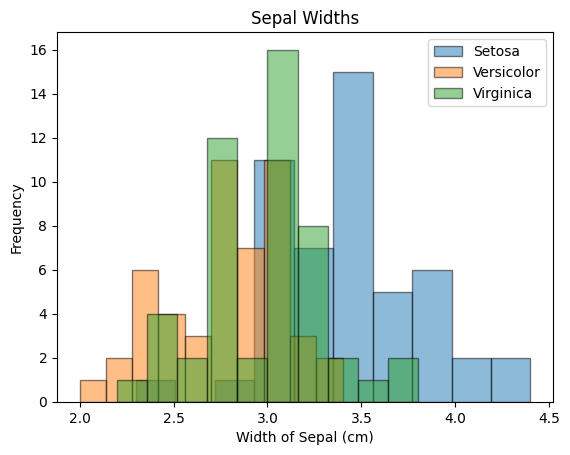

In [16]:
#*************************************************************************************************************************************
# Sepal Widths
#*************************************************************************************************************************************
fig, ax = plt.subplots()
# I'm going to separate each class of iris on the historgram because it can help determine how they differ
ax.hist(setosa_sepal_width, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_sepal_width, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_sepal_width, bins=10, edgecolor="black", label="Virginica", alpha=0.5)
ax.legend()
ax.set_xlabel("Width of Sepal (cm)")
ax.set_ylabel("Frequency")
plt.title("Sepal Widths")
#plt.show()
#plt.savefig("sepal_widths.png")

Text(0.5, 1.0, 'Petal Lengths')

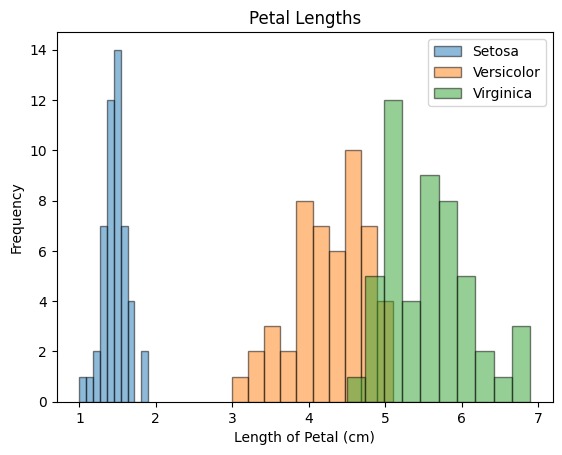

In [17]:
#*************************************************************************************************************************************
# Petal Lengths
#*************************************************************************************************************************************
fig, ax = plt.subplots()
# I'm going to separate each class of iris on the historgram because it can help determine how they differ
ax.hist(setosa_petal_length, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_petal_length, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_petal_length, bins=10, edgecolor="black", label="Virginica", alpha=0.5)
ax.legend()
ax.set_xlabel("Length of Petal (cm)")
ax.set_ylabel("Frequency")
plt.title("Petal Lengths")
#plt.show()
#plt.savefig("petal_lengths.png")

Text(0.5, 1.0, 'Petal Widths')

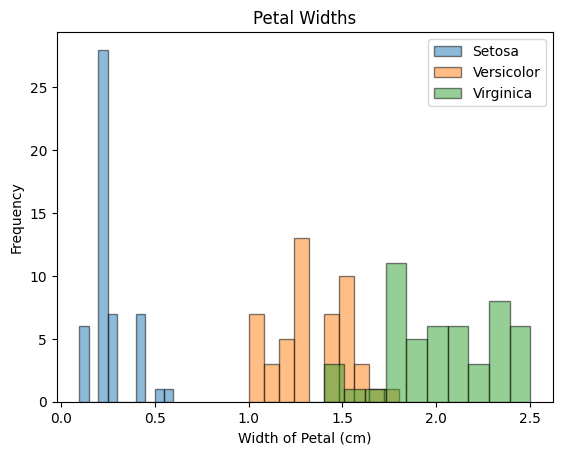

In [18]:
#*************************************************************************************************************************************
# Petal Widths
#*************************************************************************************************************************************
fig, ax = plt.subplots()
# I'm going to separate each class of iris on the historgram because it can help determine how they differ
ax.hist(setosa_petal_width, bins=10, edgecolor="black", label="Setosa", alpha=0.5)
ax.hist(versicolor_petal_width, bins=10, edgecolor="black", label="Versicolor", alpha=0.5)
ax.hist(virginica_petal_width, bins=10, edgecolor="black", label="Virginica", alpha=0.5)
ax.legend()
ax.set_xlabel("Width of Petal (cm)")
ax.set_ylabel("Frequency")
plt.title("Petal Widths")
#plt.show()
#plt.savefig("petal_widths.png")

## Task 5: Investigate Relationships

Choosing two features from the data set, I'm going to create a scatter plot to investigate their relationship, if any.
I will color-code each the three different classes of iris on the scatter plot points.

Intuitively, my scatter plot should show a positive relationship between the length of a petal and its width. Further, I want to show that this relationship is consistent across all three types of iris, even though their relative petal sizes my differ from one another.

#### Scatter Chart

Now to plot the petal widths against my petal lengths.

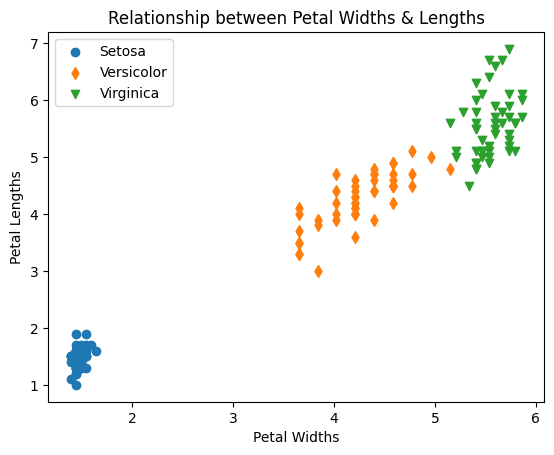

In [32]:
# ************************************************************************************************************************************************
# Petal Lengths vs Petal Widths (Scatter Plot)
# ***************************************************************************************************************************************************
fig, ax = plt.subplots()

#Scatter plot
ax.scatter(setosa_petal_width,setosa_petal_length, marker="o",label="Setosa")
ax.scatter(versicolor_petal_width,versicolor_petal_length,marker="d", label="Versicolor")
ax.scatter(virginica_petal_width,virginica_petal_length,marker="v", label="Virginica")

#Labels
ax.set_xlabel("Petal Widths")
ax.set_ylabel("Petal Lengths")
ax.legend()

plt.title("Relationship between Petal Widths & Lengths")
#plt.show()
plt.savefig("petal_lengths_vs_petal_widths.png")



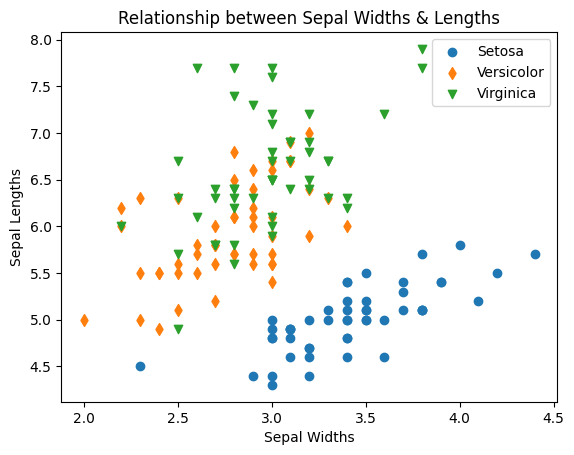

In [33]:
# ************************************************************************************************************************************************
# Sepal Lengths vs Sepal Widths (Scatter Plot)
# ***************************************************************************************************************************************************
fig, ax = plt.subplots()

#Scatter plot
ax.scatter(setosa_sepal_width,setosa_sepal_length, marker="o",label="Setosa")
ax.scatter(versicolor_sepal_width,versicolor_sepal_length,marker="d", label="Versicolor")
ax.scatter(virginica_sepal_width,virginica_sepal_length,marker="v", label="Virginica")

#Labels
ax.set_xlabel("Sepal Widths")
ax.set_ylabel("Sepal Lengths")
ax.legend()

plt.title("Relationship between Sepal Widths & Lengths")
#plt.show()
plt.savefig("sepal_lengths_vs_sepal_widths.png")

## Task 6: Analyze Relationship

Use numpy.polyfit to add a regression line to the scatter plot.
I can quite clearly there is a positive relationship, so i am expected a positive slope for all three of my lines. Note,that i could try and fit a line through all three classes of iris, but i feel that this would result in a less accurate line, and would lose interpretative power. Creating a line for each class is more intuitive in my opinion. 


In [34]:
# ************************************************************************************************************************************************
# Petal Lengths vs Petal Widths (Equation of a line)
# ***************************************************************************************************************************************************

# Use polyfit to fit a line to the data.
m1, c1 = np.polyfit(setosa_petal_width, setosa_petal_length, 1)
m2, c2 = np.polyfit(versicolor_petal_width, versicolor_petal_length, 1)
m3, c3 = np.polyfit(virginica_petal_width, virginica_petal_length, 1)

print(f"\nSetosa:\t\t y = {round(m1,2)}x + {round(c1,2)}")
print(f"Versicolor:\t y = {round(m2,2)}x + {round(c2,2)}")
print(f"Virginica:\t y = {round(m3,2)}x + {round(c3,2)}\n")

# We know what our slope and intercept coefficients are now, we can now create y-coordinates for each value of our petal widths.
y1 = setosa_petal_width* m1 + c1
y2 = versicolor_petal_width* m2 + c2
y3 = virginica_petal_width* m3 + c3

print (f"The y-coordinates for equation of a line for Setosa are:\n {y1}\n")
print (f"The y-coordinates for equation of a line for Versicolor are:\n {y2}\n")
print (f"The y-coordinates for equation of a line for Virginica are:\n{y3}")




Setosa:		 y = 1.0x + -0.0
Versicolor:	 y = 1.0x + -0.0
Virginica:	 y = 1.0x + 0.0

The y-coordinates for equation of a line for Setosa are:
 [1.4421875  1.4421875  1.4421875  1.4421875  1.4421875  1.54133523
 1.49176136 1.4421875  1.4421875  1.39261364 1.4421875  1.4421875
 1.39261364 1.39261364 1.4421875  1.54133523 1.54133523 1.49176136
 1.49176136 1.49176136 1.4421875  1.54133523 1.4421875  1.59090909
 1.4421875  1.4421875  1.54133523 1.4421875  1.4421875  1.4421875
 1.4421875  1.54133523 1.39261364 1.4421875  1.39261364 1.4421875
 1.4421875  1.39261364 1.4421875  1.4421875  1.49176136 1.49176136
 1.4421875  1.64048295 1.54133523 1.49176136 1.4421875  1.4421875
 1.4421875  1.4421875 ]

The y-coordinates for equation of a line for Versicolor are:
 [4.39833003 4.5852625  4.5852625  4.21139756 4.5852625  4.21139756
 4.77219497 3.65060015 4.21139756 4.39833003 3.65060015 4.5852625
 3.65060015 4.39833003 4.21139756 4.39833003 4.5852625  3.65060015
 4.5852625  3.83753262 5.14605991 4.211

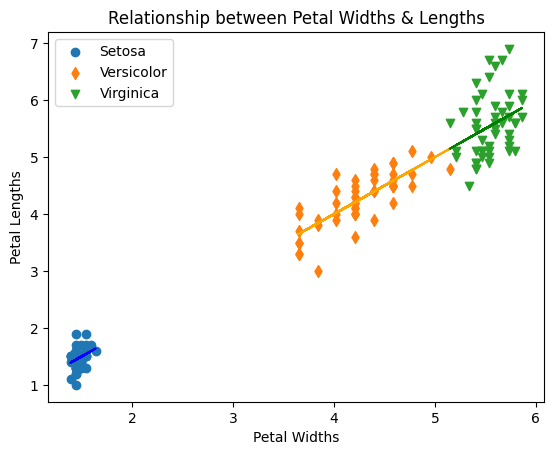

In [35]:
# ************************************************************************************************************************************************
# Petal Lengths vs Petal Widths (Scatter Plot)
# ***************************************************************************************************************************************************
fig, ax = plt.subplots()

#Scatter plot
ax.scatter(setosa_petal_width,setosa_petal_length, marker="o",label="Setosa")
ax.scatter(versicolor_petal_width,versicolor_petal_length,marker="d", label="Versicolor")
ax.scatter(virginica_petal_width,virginica_petal_length,marker="v", label="Virginica")
ax.plot(setosa_petal_width, y1, color='blue')
ax.plot(versicolor_petal_width, y2, color='orange')
ax.plot(virginica_petal_width, y3, color='green')

#Labels
ax.set_xlabel("Petal Widths")
ax.set_ylabel("Petal Lengths")
ax.legend()

plt.title("Relationship between Petal Widths & Lengths")
#plt.show()
plt.savefig("petal_lengths_vs_petal_widths.png")



In [36]:
# ************************************************************************************************************************************************
# Sepal Lengths vs Sepal Widths (Equation of a line)
# ***************************************************************************************************************************************************

# Use polyfit to fit a line to the data.
m1, c1 = np.polyfit(setosa_sepal_width, setosa_sepal_length, 1)
m2, c2 = np.polyfit(versicolor_sepal_width, versicolor_sepal_length, 1)
m3, c3 = np.polyfit(virginica_sepal_width, virginica_sepal_length, 1)

print(f"\nSetosa:\t\t y = {round(m1,2)}x + {round(c1,2)}")
print(f"Versicolor:\t y = {round(m2,2)}x + {round(c2,2)}")
print(f"Virginica:\t y = {round(m3,2)}x + {round(c3,2)}\n")

# We know what our slope and intercept coefficients are now, we can now create y-coordinates for each value of our sepal widths.
y1 = setosa_sepal_width* m1 + c1
y2 = versicolor_sepal_width* m2 + c2
y3 = virginica_sepal_width* m3 + c3

print (f"The y-coordinates for equation of a line for Setosa are:\n {y1}\n")
print (f"The y-coordinates for equation of a line for Versicolor are:\n {y2}\n")
print (f"The y-coordinates for equation of a line for Virginica are:\n{y3}")





Setosa:		 y = 0.69x + 2.64
Versicolor:	 y = 0.87x + 3.54
Virginica:	 y = 0.9x + 3.91

The y-coordinates for equation of a line for Setosa are:
 [5.06265006 4.71722286 4.85539374 4.7863083  5.1317355  5.33899182
 4.99356462 4.99356462 4.64813742 4.7863083  5.20082094 4.99356462
 4.71722286 4.71722286 5.40807726 5.68441902 5.33899182 5.06265006
 5.26990638 5.26990638 4.99356462 5.20082094 5.1317355  4.92447918
 4.99356462 4.71722286 4.99356462 5.06265006 4.99356462 4.85539374
 4.7863083  4.99356462 5.4771627  5.54624814 4.7863083  4.85539374
 5.06265006 4.7863083  4.71722286 4.99356462 5.06265006 4.23362479
 4.85539374 5.06265006 5.26990638 4.71722286 5.26990638 4.85539374
 5.20082094 4.92447918]

The y-coordinates for equation of a line for Versicolor are:
 [6.30798342 6.30798342 6.22147565 5.52941347 5.96195233 5.96195233
 6.39449119 5.61592124 6.0484601  5.87544456 5.26989016 6.13496788
 5.4429057  6.0484601  6.0484601  6.22147565 6.13496788 5.87544456
 5.4429057  5.70242902 6.307983

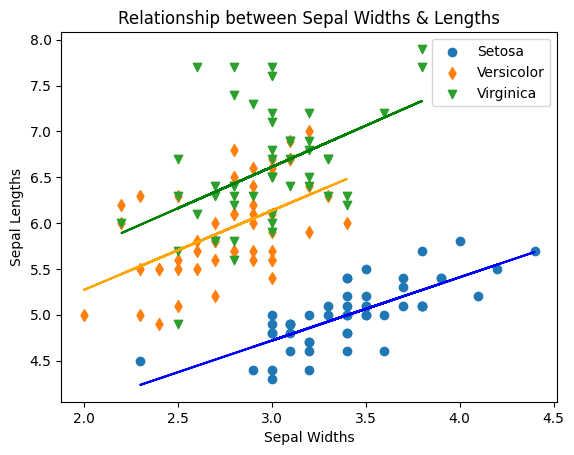

In [37]:
# ************************************************************************************************************************************************
# Sepal Lengths vs Sepal Widths (Scatter Plot)
# ***************************************************************************************************************************************************
fig, ax = plt.subplots()

#Scatter plot
ax.scatter(setosa_sepal_width,setosa_sepal_length, marker="o",label="Setosa")
ax.scatter(versicolor_sepal_width,versicolor_sepal_length,marker="d", label="Versicolor")
ax.scatter(virginica_sepal_width,virginica_sepal_length,marker="v", label="Virginica")
ax.plot(setosa_sepal_width, y1, color='blue')
ax.plot(versicolor_sepal_width, y2, color='orange')
ax.plot(virginica_sepal_width, y3, color='green')

#Labels
ax.set_xlabel("Sepal Widths")
ax.set_ylabel("Sepal Lengths")
ax.legend()

plt.title("Relationship between Sepal Widths & Lengths")
#plt.show()
plt.savefig("sepal_lengths_vs_sepal_widths.png")

If we want the equation of a line (y = mx) that passes through the data of each of the three species of iris, then we get the following:

## Task 7: Analyze Class Distributions

Create box-plots of the petal lengths for each of the three classes

In [27]:
setosa_petal_length=[iris[0][0][2],iris[0][1][2],iris[0][2][2],iris[0][3][2],iris[0][4][2],iris[0][5][2],iris[0][6][2],iris[0][7][2],iris[0][8][2],iris[0][9][2],iris[0][10][2],iris[0][11][2],iris[0][12][2],iris[0][13][2],iris[0][14][2],iris[0][15][2],iris[0][16][2],iris[0][17][2],iris[0][18][2],iris[0][19][2],iris[0][20][2],iris[0][21][2],iris[0][22][2],iris[0][23][2],iris[0][24][2],iris[0][25][2],iris[0][26][2],iris[0][27][2],iris[0][28][2],iris[0][29][2],iris[0][30][2],iris[0][31][2],iris[0][32][2],iris[0][33][2],iris[0][34][2],iris[0][35][2],iris[0][36][2],iris[0][37][2],iris[0][38][2],iris[0][39][2],iris[0][40][2],iris[0][41][2],iris[0][42][2],iris[0][43][2],iris[0][44][2],iris[0][45][2],iris[0][46][2],iris[0][47][2],iris[0][48][2],iris[0][49][2]]
versicolor_petal_length=[iris[1][0][2],iris[1][1][2],iris[1][2][2],iris[1][3][2],iris[1][4][2],iris[1][5][2],iris[1][6][2],iris[1][7][2],iris[1][8][2],iris[1][9][2],iris[1][10][2],iris[1][11][2],iris[1][12][2],iris[1][13][2],iris[1][14][2],iris[1][15][2],iris[1][16][2],iris[1][17][2],iris[1][18][2],iris[1][19][2],iris[1][20][2],iris[1][21][2],iris[1][22][2],iris[1][23][2],iris[1][24][2],iris[1][25][2],iris[1][26][2],iris[1][27][2],iris[1][28][2],iris[1][29][2],iris[1][30][2],iris[1][31][2],iris[1][32][2],iris[1][33][2],iris[1][34][2],iris[1][35][2],iris[1][36][2],iris[1][37][2],iris[1][38][2],iris[1][39][2],iris[1][40][2],iris[1][41][2],iris[1][42][2],iris[1][43][2],iris[1][44][2],iris[1][45][2],iris[1][46][2],iris[1][47][2],iris[1][48][2],iris[1][49][2]]
virginica_petal_length=[iris[2][0][2],iris[2][1][2],iris[2][2][2],iris[2][3][2],iris[2][4][2],iris[2][5][2],iris[2][6][2],iris[2][7][2],iris[2][8][2],iris[2][9][2],iris[2][10][2],iris[2][11][2],iris[2][12][2],iris[2][13][2],iris[2][14][2],iris[2][15][2],iris[2][16][2],iris[2][17][2],iris[2][18][2],iris[2][19][2],iris[2][20][2],iris[2][21][2],iris[2][22][2],iris[2][23][2],iris[2][24][2],iris[2][25][2],iris[2][26][2],iris[2][27][2],iris[2][28][2],iris[2][29][2],iris[2][30][2],iris[2][31][2],iris[2][32][2],iris[2][33][2],iris[2][34][2],iris[2][35][2],iris[2][36][2],iris[2][37][2],iris[2][38][2],iris[2][39][2],iris[2][40][2],iris[2][41][2],iris[2][42][2],iris[2][43][2],iris[2][44][2],iris[2][45][2],iris[2][46][2],iris[2][47][2],iris[2][48][2],iris[2][49][2]]

petal_lengths=np.array([setosa_petal_length, versicolor_petal_length,virginica_petal_length])
#print(petal_lengths)
# create figure, axis
fig, ax = plt.subplots()

# create boxplot, we will use .T because we need to transpose our data to make rows columns and columns rows because thats what boxplot expect)
ax.boxplot(petal_lengths.T)

# title
ax.set_title("Classes of Iris", fontsize=16)

# axis labels
ax.set_xlabel("Classes", fontsize=12)
ax.set_ylabel("Petal Length", fontsize=12)

# set names of x-axis ticks, just puts the names on the horizontal axis 
ax.set_xticks([1,2,3],["Setosa","Versicolor","Virginica"], fontsize=10)

# add a grid so we have horizontal dotted lines making it easier to see the values on the chart, alpha is how transparent the dotted lines are
ax.grid(axis="y", linestyle="--", alpha=0.7)


NameError: name 'iris' is not defined

We can see three very different boxplots. First, let's remind ourselves what a boxplot explains.

The orange line in the box, this is the median or the 50% percentile. 
The bottom of the box is the 25% percentile indicating that 25% of your values are less than that. 
The top of the box is the 75% percentile indicating that 25% of your values are above that. (50% of the values are in the box, 50% are outside, be it above or below)
The whiskers either side of the box are calculated by subracting the value at the 25% percentile from the 75% percentile (the interquartile range), and multiplying it by 1.5, and then it retreats back towards the box until it hits the first observation, their length tells you how disperse your data is. 
If there are observations outside the length of 1.5 x interquartile range, they can be referred to as outliers - these are indicated by circles above the top whisker or below the bottom whisker. If they exist, these tell us our maximums and minimums, otherwise the end ofthe whiskers give you the maximums and minimums. 

##### Medians
There are significant differences between our classes. Looking at the orange line, the Setosa petal median is around 1.5cms, while the Versicolor is about 4.5cms and the Virginica about 5.5cms. In all three, the orange line is in the middle of the boxes, so we can deduce there is little skewness in the data for each of the classes.
##### Interquartile Ranges
The interquartile range for the Setosa is very tight, while it is relatively consistent between the Versicolor and Virginica, although the Virginica is still bigger. Given that the interquartile range tells us where 50% of the values lie, then we can say that the variance of the length of Setosa petal is much small than the other two.
##### Whiskers
The whiskers are very short for the Setosa, again reinforcing how concentrated its data around the media. The whiskers for the Virginica are longer than that forthe Versicolor suggesting more variance in its data. Also, the lower whisker for the Versicolor is longer than the upper whisker suggesting it has observations at a lower distance from the median than it has observations at a higher distance from the median, ignoring outliers. For Virginica, the opposite is the case, the upper whisker is longer than the lower whisker suggesting it has observations at a higher distance from the median than it has observations at a lower distance from the median, ignoring outliers.
##### Outliers
There are some outliers above and below the whiskers for the Setosa class, not too far above and below it must be said. Given how tight the data is for Setosa, this is expected. For the Versicolor class, we already said how the lower whisker was longer than its upper whisker, well there is an outlier even below the bottom whisker.
##### Overlap
There is very little overlap between the three classes of iris, absolultely no overlap between Setosa and the other two. There is some overlap between high values of Versicolor against low values for Virginica. However, it is only the lower whisker of the Virginica, (that is 25%) that overlaps with the upper whisker of Versicolor and the op of the box (about 50% of Versicolor).
I would deduce from this boxplot, that the Setosa is very different class to the other two.


## Task 8: Compute Correlations

Calculate the correlation coefficients between the features.
Display the results as a heatmap using matplotlib.

## Task 9: Fit a Simple Linear Regression

For your two features in Task 5, calculate the coefficient of determination R 2 .
Re-create the plot from Task 6 and annotate it with the R 2 value.

## Task 10: Too Many Features

Use seaborn to create a pairplot of the data set.
Explain, in your own words, what the pairplot depicts.

## End